In [1]:
# Initial imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


## Data preparation

In [2]:
# Read csv file
data_df = pd.read_csv('resources/crypto_data.csv')

# Drop of `Unnamed: 0` column
data_df = data_df.drop(columns='Unnamed: 0')
data_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Filter for cryptos that are being traded
crypto_df = data_df[data_df['IsTrading'] == True]


In [4]:
# Drop the 'IsTrading' column 
crypto_df = crypto_df.drop(columns='IsTrading')

In [5]:
# Check and drop nulls
crypto_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
crypto_df.dropna(inplace=True)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Filter for cryptocurrencies that are greater than zero
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]

In [8]:
# Drop `CoinName` column
crypto_df = crypto_df.drop(columns='CoinName')

In [9]:
# Convert categorical data to numerical using `pd.get_dummies`
crypto_con = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
crypto_con

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
crypto_con.shape

(532, 98)

In [11]:
# Standardize the dataset 
crypto_scaled = StandardScaler().fit_transform(crypto_con)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

## Dimensionality Reduction

In [12]:
# Apply PCA for dimentionality reduction, preserve 90% of the varience
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(crypto_scaled)

In [13]:
crypto_pca.shape

(532, 74)

In [14]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [15]:
# Create PCA dataframe
crypto_pca_df = pd.DataFrame(data=crypto_pca, index=crypto_con.index)
crypto_pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.308850e-14,-1.266160e-11,2.080310e-14,-0.007129,-1.319756,-0.051813,...,3.459699e-15,2.014069e-15,2.658265e-16,9.165964e-16,1.972844e-15,5.998157e-15,2.236962e-15,3.089610e-15,2.866068e-15,1.583200e-15
2,-0.318434,1.032331,-0.591126,0.001386,-1.323705e-14,-1.255835e-11,2.069088e-14,-0.007739,-1.322514,-0.056674,...,4.477850e-15,1.257149e-15,8.754675e-18,1.248435e-16,3.144746e-15,7.501685e-15,2.309334e-15,4.933720e-15,1.800386e-15,1.004894e-15
5,2.305468,1.656383,-0.683617,0.004731,-2.972731e-14,-4.290588e-11,2.729459e-14,-0.054781,-1.542879,-0.943951,...,1.053780e-14,-3.990608e-14,2.300265e-14,7.314042e-14,-5.883687e-14,-6.653927e-14,-5.448342e-15,-6.098495e-14,6.982033e-15,-6.422078e-14
7,-0.145184,-1.320593,0.192813,-0.001229,7.739934e-15,1.113849e-11,-6.783813e-15,-0.002071,0.281463,0.251862,...,-2.430801e-16,-9.093636e-16,1.426626e-15,9.140362e-15,-1.190865e-14,-2.632450e-15,5.331215e-15,1.479103e-16,-4.780285e-15,-8.217000e-15
8,-0.151768,-2.036192,0.396182,-0.001705,1.629240e-14,1.545822e-11,-1.329989e-14,0.027735,0.519099,0.188820,...,-1.719534e-13,1.779051e-13,-2.645889e-15,-4.405292e-14,-4.455551e-15,1.512555e-14,1.207593e-13,-1.719674e-14,3.827912e-14,2.959987e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.471251,0.822241,-0.071160,-0.008206,-5.344446e-14,7.465056e-11,2.497039e-15,-0.851713,2.041159,3.560713,...,-3.053896e-15,1.683480e-15,4.824580e-15,6.535119e-15,-1.528642e-14,-6.831600e-15,1.084022e-14,1.879314e-15,-7.197253e-15,-5.384205e-15
1242,-0.333144,1.032071,-0.590740,0.001399,-1.314173e-14,-1.268270e-11,2.071987e-14,-0.007154,-1.320125,-0.052460,...,3.516771e-15,2.102634e-15,2.349544e-16,5.763103e-16,2.203956e-15,6.427495e-15,2.401716e-15,3.410915e-15,2.562621e-15,1.447039e-15
1245,0.324349,-2.312308,0.421515,-0.001319,1.233920e-14,1.195249e-11,-1.427522e-14,0.017309,0.161077,-0.047787,...,-3.327072e-14,3.937655e-14,8.733828e-15,-5.518685e-15,-1.835672e-14,-1.113766e-14,4.819937e-14,3.769261e-14,1.576271e-15,4.860094e-15
1246,-0.149364,-2.049336,0.412968,-0.001745,1.482173e-14,1.581409e-11,-1.504675e-14,0.028954,0.544389,0.233373,...,1.902365e-15,2.192287e-17,-1.216822e-15,-9.402089e-16,1.287104e-15,4.995983e-15,3.393855e-15,5.645830e-16,-2.143167e-15,2.954999e-15


In [16]:
# Run t-SNE 
tsne = TSNE(learning_rate=180)
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features.shape

(532, 2)

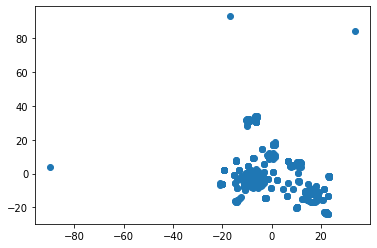

In [17]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

##### After running t-SNE, it shows possible 2 or 3 clusters and some outliers. 

## Cluster Analysis with k-Means

In [18]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(tsne_features)
  inertia.append(km.inertia_)

# Create the Elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df


,k,inertia
0,1,206469.734375
1,2,122354.265625
2,3,69593.671875
3,4,42499.648438
4,5,35766.429688
5,6,29435.701172
6,7,24359.107422
7,8,19524.701172
8,9,16613.146484
9,10,13727.876953


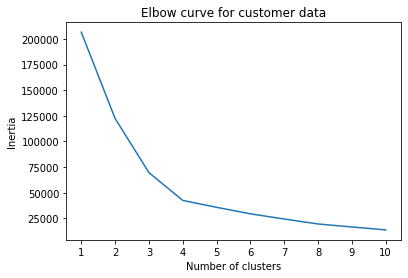

In [19]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

##### The plot suggests best k value is 4

In [20]:
# Initialize the k-means model, using k=4
model = KMeans(n_clusters=4, random_state=0)
model.fit(tsne_features)

# Predict clusters
preds = model.predict(tsne_features)
preds

array([1, 1, 1, 2, 0, 0, 3, 0, 0, 0, 3, 0, 2, 2, 0, 1, 3, 0, 1, 1, 0, 0,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 1, 3, 0, 3, 2, 0, 0, 0, 1, 0, 0, 3, 0, 2, 3, 1, 0,
       2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 3, 2, 0, 2, 1, 3, 2, 2, 2, 3, 1,
       1, 0, 0, 3, 0, 3, 0, 2, 1, 1, 0, 0, 0, 3, 0, 2, 1, 0, 3, 0, 1, 0,
       3, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 1, 3, 0, 2, 1,
       3, 3, 0, 0, 3, 0, 1, 0, 2, 1, 3, 2, 1, 0, 0, 2, 3, 0, 2, 2, 1, 1,
       3, 3, 0, 0, 0, 3, 3, 2, 0, 3, 0, 3, 3, 2, 2, 1, 3, 0, 3, 1, 1, 1,
       1, 3, 3, 0, 3, 1, 0, 2, 2, 3, 1, 0, 1, 0, 3, 2, 0, 0, 1, 3, 1, 3,
       0, 3, 1, 1, 3, 1, 0, 0, 3, 3, 0, 3, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1,
       0, 1, 1, 3, 0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 1, 3, 1, 0, 3,
       0, 0, 1, 3, 0, 1, 0, 0, 3, 0, 3, 1, 3, 0, 3, 3, 1, 3, 3, 1, 1, 1,
       2, 3, 0, 3, 2, 3, 1, 1, 2, 0, 3, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1, 0,
       1, 0, 3, 3, 1, 0, 1, 0, 0, 1, 3, 3, 1, 2, 3,

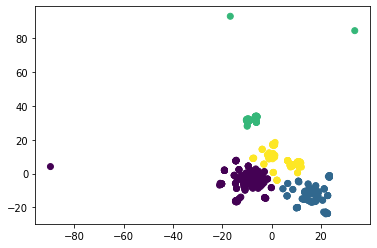

In [21]:
# Plot T-SNE reduced dimentions results with labels
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.show()


## Recommendation

##### Based on the scatter plot above, the cryptocurrencies could be classified into 4 clusters. However there are three outliers included in one of the clusters. To consider the size of clusters (number of data points) and the outliers inclusive, this dataset could possibly classified into 3 clusters as well.